In [1]:
import os, sys
cur_dir = os.getcwd()
basename = os.path.basename(cur_dir)
for _ in range(5):
    if basename != 'OCLog':
        cur_dir = os.path.dirname(cur_dir)
        basename = os.path.basename(cur_dir)
        #print(cur_dir, basename)
    else:
        if cur_dir not in sys.path:
            sys.path.append(cur_dir)
            #print(sys.path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm import trange, tqdm, tnrange
from oclog.BGL.bglogUKC import BGLog, get_embedding_layer
from oclog.openset.boundary_loss import euclidean_metric, BoundaryLoss
from oclog.openset.pretraining import LogLineEncoder, LogSeqEncoder, LogClassifier
# from oclog.openset.openset import OpenSet
from oclog.openset.opensetv4 import OpenSet
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import sklearn.metrics as m
import warnings
warnings.filterwarnings('ignore')

In [8]:
designated_ukc_cls = 5

In [3]:
bglog = BGLog(save_padded_num_sequences=False, debug=True,  load_from_pkl=True, )
train_test = bglog.get_tensor_train_val_test(ablation=3000, designated_ukc_cls=designated_ukc_cls )
train_data, val_data, test_data = train_test

ablation set to : 3000
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgltkukc.pkl
train_0:, 2400
val_0:, 300
test_0:, 300
train_1:, 2400
val_1:, 300
test_1:, 300
train_2:, 2400
val_2:, 300
test_2:, 300
902 data in class 3 not enough to split into train:2400 and validation:300, adding the entire data as ukc
628 data in class 4 not enough to split into train:2400 and validation:300, adding the entire data as ukc
class 5 is added as ukc
ukc_5:, 165
75 data in class 6 not enough to split into train:2400 and validation:300, adding the entire data as ukc
train: 0    2400
1    2400
2    2400
Name: label, dtype: int64
val: 0    300
1    300
2    300
Name: label, dtype: int64
test: 0    300
1    300
2    300
5    165
Name: label, dtype: int64
[[1. 0. 0.]
 [1. 0. 0.]]
some example of labels:
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]]
<BatchDataset 

In [4]:
line_encoder = LogLineEncoder(bglog, chars_in_line=64)
logSeqencer =  LogSeqEncoder(line_in_seq=32)
ptmodel = LogClassifier(line_encoder=line_encoder, seq_encoder=logSeqencer, num_classes=3)
ptmodel.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
hist = ptmodel.fit(train_data, validation_data=val_data, epochs=7) 

vocab_size: 50
Epoch 1/7
225/225 [==============================] - 22s 93ms/step - loss: 0.0555 - accuracy: 0.9815 - precision: 0.9924 - recall: 0.9729 - val_loss: 0.0175 - val_accuracy: 0.9944 - val_precision: 0.9944 - val_recall: 0.9944
Epoch 2/7
225/225 [==============================] - 21s 93ms/step - loss: 0.0012 - accuracy: 0.9997 - precision: 0.9997 - recall: 0.9996 - val_loss: 7.6456e-04 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/7
225/225 [==============================] - 22s 96ms/step - loss: 2.0953e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/7
225/225 [==============================] - 21s 94ms/step - loss: 1.2682e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/7
225/225 [==============================] - 21s 94ms/step - loss

100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.44it/s]


epoch: 1/50, train_loss: 2.7837443351745605, eval_score: 0.9478210982273488


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.52it/s]


epoch: 2/50, train_loss: 2.7837536334991455, eval_score: 0.9572596578147513


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.52it/s]


epoch: 3/50, train_loss: 2.7837109565734863, eval_score: 0.9681750502208067


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.51it/s]


epoch: 4/50, train_loss: 2.7837228775024414, eval_score: 0.9937773477898072


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.53it/s]


epoch: 5/50, train_loss: 2.7838191986083984, eval_score: 0.9940652312128544


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.55it/s]


epoch: 6/50, train_loss: 2.783745765686035, eval_score: 0.9977628635346757


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.54it/s]


epoch: 7/50, train_loss: 2.7838685512542725, eval_score: 0.9985352584222641


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.54it/s]


epoch: 8/50, train_loss: 2.783917188644409, eval_score: 0.9977059171782224


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.55it/s]


epoch: 9/50, train_loss: 2.783823251724243, eval_score: 0.9977059171782224


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.56it/s]


epoch: 10/50, train_loss: 2.78375506401062, eval_score: 0.9977059171782224


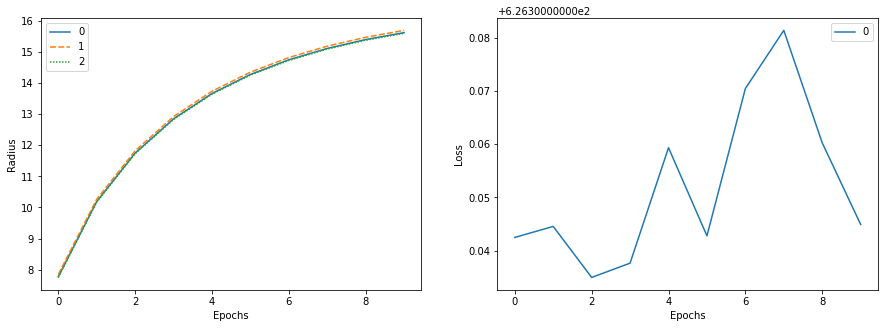

In [5]:
oset = OpenSet(3, ptmodel)
_, _ = oset.train(train_data, epochs=50, lr_rate=5, wait_patient=3,)

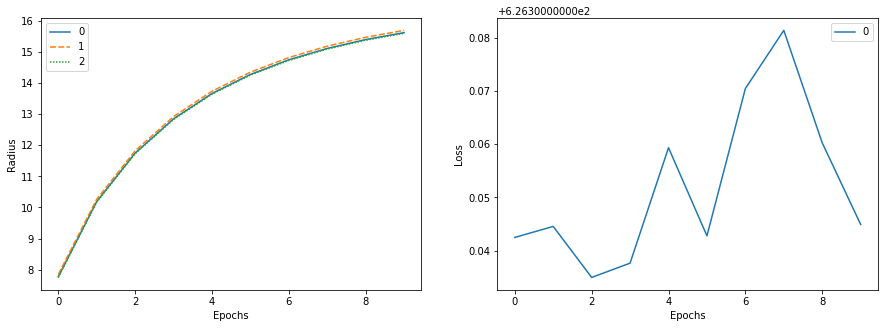

euc_dis: tf.Tensor(
[ 4.213268    0.6080399   0.3950067   4.213268    3.158432    1.3521844
  4.213268    4.213268    4.234105    0.54622275  1.2791728   4.213268
  1.3521844   1.3521844  11.835717    0.3260287   0.26721442  4.6832232
  5.412607    7.079365    4.213268    1.3521844   4.213268    3.5253708
  0.39061236  7.568239    0.2909318   0.44145352  4.213268    4.213268
  9.846568    0.34694993], shape=(32,), dtype=float32)
pred_radius: tf.Tensor(
[14.822731 14.75049  14.75049  14.822731 14.729654 14.729654 14.822731
 14.822731 14.729654 14.75049  14.75049  14.822731 14.729654 14.729654
 14.822731 14.75049  14.75049  14.729654 14.729654 14.729654 14.822731
 14.729654 14.822731 14.729654 14.75049  14.729654 14.75049  14.75049
 14.822731 14.822731 14.822731 14.75049 ], shape=(32,), dtype=float32)
predictions with ukc_label=999 [1 0 0 1 2 2 1 1 2 0 0 1 2 2 1 0 0 2 2 2 1 2 1 2 0 2 0 0 1 1 1 0]
[[2400    0    0    0]
 [   0 2379    0   21]
 [   0    0 2400    0]
 [   0    0    0    0]]

In [6]:
oset.plot_radius_chages()
preds = oset.openpredict(oset.features)
y_true, y_pred, _ = oset.evaluate(train_data, zero_div=0)

In [9]:
y_true, y_pred, _ = oset.evaluate(test_data, ukc_label=designated_ukc_cls)

[[294   0   0   0]
 [  0 300   0   0]
 [  0   0 298   0]
 [ 43  10   7 104]]
94.32
f1_weighted: 0.9383251081362717, f1_macro: 0.9199928841240611, f1_micro: 0.9431818181818182, f_measure: {'Known': 96.7951, 'Open': 77.6119, 'F1-score': 91.9993}
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       294
           1       0.97      1.00      0.98       300
           2       0.98      1.00      0.99       298
           5       1.00      0.63      0.78       164

    accuracy                           0.94      1056
   macro avg       0.95      0.91      0.92      1056
weighted avg       0.95      0.94      0.94      1056



100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.37it/s]


epoch: 1/50, train_loss: 2.7818171977996826, eval_score: 0.569482944400169


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.49it/s]


epoch: 2/50, train_loss: 2.7818362712860107, eval_score: 0.5833970783103359


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.49it/s]


epoch: 3/50, train_loss: 2.7818405628204346, eval_score: 0.6041294998198858


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.50it/s]


epoch: 4/50, train_loss: 2.781794548034668, eval_score: 0.8923154292128923


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.37it/s]


epoch: 5/50, train_loss: 2.7818422317504883, eval_score: 0.8982974665867689


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.46it/s]


epoch: 6/50, train_loss: 2.7818193435668945, eval_score: 0.901202979637732


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.57it/s]


epoch: 7/50, train_loss: 2.7818872928619385, eval_score: 0.9056531165489754


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.57it/s]


epoch: 8/50, train_loss: 2.781862258911133, eval_score: 0.90835529530799


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.55it/s]


epoch: 9/50, train_loss: 2.78179669380188, eval_score: 0.9105131215224929


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.56it/s]


epoch: 10/50, train_loss: 2.781851053237915, eval_score: 0.9117958652943174


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.46it/s]


epoch: 11/50, train_loss: 2.7817893028259277, eval_score: 0.9141083880078912


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.27it/s]


epoch: 12/50, train_loss: 2.781827449798584, eval_score: 0.9152702787339269


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.48it/s]


epoch: 13/50, train_loss: 2.7817893028259277, eval_score: 0.9155214559965239


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.53it/s]


epoch: 14/50, train_loss: 2.7818057537078857, eval_score: 0.9159393197994584


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.33it/s]


epoch: 15/50, train_loss: 2.781787157058716, eval_score: 0.9162729242559134


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.54it/s]


epoch: 16/50, train_loss: 2.781806468963623, eval_score: 0.9167721905424999


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.53it/s]


epoch: 17/50, train_loss: 2.7818610668182373, eval_score: 0.9175285041229615


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.51it/s]


epoch: 18/50, train_loss: 2.7817749977111816, eval_score: 0.9177767200194934


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.55it/s]


epoch: 19/50, train_loss: 2.7818281650543213, eval_score: 0.9181071483883799


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.54it/s]


epoch: 20/50, train_loss: 2.7817533016204834, eval_score: 0.918189661694166


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.35it/s]


epoch: 21/50, train_loss: 2.781822443008423, eval_score: 0.9185296775150134


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.43it/s]


epoch: 22/50, train_loss: 2.7818119525909424, eval_score: 0.9186943673631143


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.46it/s]


epoch: 23/50, train_loss: 2.7817938327789307, eval_score: 0.9188589078665331


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.47it/s]


epoch: 24/50, train_loss: 2.7818517684936523, eval_score: 0.9188589078665331


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:31<00:00,  7.22it/s]


epoch: 25/50, train_loss: 2.781862258911133, eval_score: 0.918941122177455


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.50it/s]


epoch: 26/50, train_loss: 2.781812906265259, eval_score: 0.918941122177455


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.49it/s]


epoch: 27/50, train_loss: 2.7818570137023926, eval_score: 0.918941122177455


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.50it/s]


epoch: 28/50, train_loss: 2.781862258911133, eval_score: 0.918941122177455


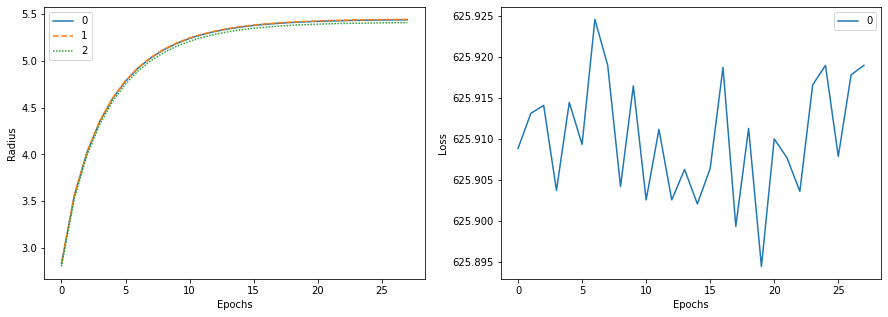

In [10]:
#check the centroids, radius per class and lower the learnig rate
oset = OpenSet(3, ptmodel)
_, _ = oset.train(train_data, epochs=50, lr_rate=1.5, wait_patient=3,)

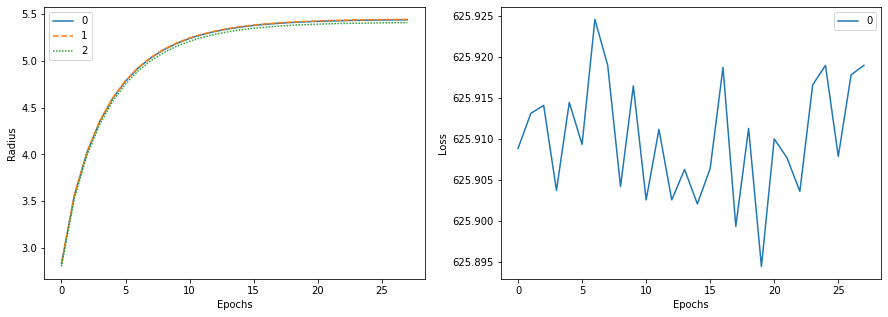

euc_dis: tf.Tensor(
[12.294376    0.41439328  4.213261    4.213261    0.2548779   0.3883049
  4.213261    4.213261    4.213261    0.27624664 12.272269    0.35218725
  0.4034562   4.213261    1.3521779   4.213261    5.1871433   5.452695
  4.213261    0.29554078  1.3521779   1.3521779   1.3521779   4.213261
  1.007095    0.2264498   4.213261    4.213261    5.6600523   0.34852988
  0.49246743  1.3521779 ], shape=(32,), dtype=float32)
pred_radius: tf.Tensor(
[5.439939  5.4354596 5.439939  5.439939  5.4354596 5.4354596 5.439939
 5.439939  5.439939  5.4354596 5.439939  5.4354596 5.4354596 5.439939
 5.4050345 5.439939  5.4050345 5.4050345 5.439939  5.4354596 5.4050345
 5.4050345 5.4050345 5.439939  5.4354596 5.4354596 5.439939  5.439939
 5.4050345 5.4354596 5.4354596 5.4050345], shape=(32,), dtype=float32)
predictions with ukc_label=999 [999   0   1   1   0   0   1   1   1   0 999   0   0   1   2   1   2 999
   1   0   2   2   2   1   0   0   1   1 999   0   0   2]
[[2400    0    0    0]
 [  

In [11]:
oset.plot_radius_chages()
preds = oset.openpredict(oset.features)
y_true, y_pred, _ = oset.evaluate(train_data, zero_div=0)

In [12]:
y_true, y_pred, _ = oset.evaluate(test_data, ukc_label=designated_ukc_cls)

[[298   0   0   0]
 [  0 297   0   0]
 [  0   0 298   0]
 [  0   0   0 163]]
100.0
f1_weighted: 1.0, f1_macro: 1.0, f1_micro: 1.0, f_measure: {'Known': 100.0, 'Open': 100.0, 'F1-score': 100.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       298
           1       1.00      1.00      1.00       297
           2       1.00      1.00      1.00       298
           5       1.00      1.00      1.00       163

    accuracy                           1.00      1056
   macro avg       1.00      1.00      1.00      1056
weighted avg       1.00      1.00      1.00      1056



In [ ]:
#check with ukc_label=3